In [1]:

import pandas as pd



In [69]:
p_day=30

In [70]:
df=pd.read_csv("Reliance.csv")
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [71]:
len(df)

1234

In [72]:
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-11-10,2516.699951,2558.000000,2503.649902,2549.899902,2549.899902,4731975
1230,2021-11-11,2540.050049,2570.500000,2535.550049,2554.550049,2554.550049,4948422
1231,2021-11-12,2562.899902,2598.750000,2557.000000,2593.100098,2593.100098,4020744
1232,2021-11-15,2600.000000,2602.199951,2570.000000,2577.800049,2577.800049,2216708
1233,2021-11-16,2572.050049,2575.000000,2495.000000,2517.899902,2517.899902,5230607


In [73]:
df1=df.reset_index()['Close']

In [74]:
df1.dropna()

0        488.643158
1        484.284454
2        489.113678
3        491.094910
4        496.023193
           ...     
1229    2549.899902
1230    2554.550049
1231    2593.100098
1232    2577.800049
1233    2517.899902
Name: Close, Length: 1234, dtype: float64

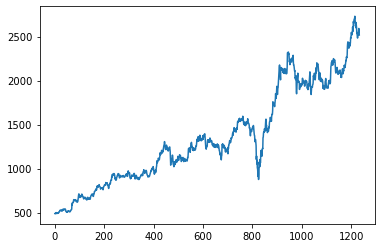

In [75]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [76]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [77]:
import numpy as np

In [78]:
df1

0        488.643158
1        484.284454
2        489.113678
3        491.094910
4        496.023193
           ...     
1229    2549.899902
1230    2554.550049
1231    2593.100098
1232    2577.800049
1233    2517.899902
Name: Close, Length: 1234, dtype: float64

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [80]:
print(df1)

[[0.0019393 ]
 [0.        ]
 [0.00214865]
 ...
 [0.93826654]
 [0.93145915]
 [0.90480803]]


In [81]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [82]:
training_size,test_size

(802, 432)

In [83]:
train_data

array([[0.0019393 ],
       [0.        ],
       [0.00214865],
       [0.00303015],
       [0.00522287],
       [0.0068867 ],
       [0.0021156 ],
       [0.00351497],
       [0.00196134],
       [0.00439647],
       [0.0027106 ],
       [0.00440748],
       [0.00374636],
       [0.00354803],
       [0.00604927],
       [0.00471601],
       [0.00932183],
       [0.01128315],
       [0.01089751],
       [0.0136742 ],
       [0.01801557],
       [0.01657214],
       [0.0174977 ],
       [0.01868771],
       [0.01766298],
       [0.01884199],
       [0.01666029],
       [0.01753075],
       [0.01536008],
       [0.01916153],
       [0.01585593],
       [0.01932681],
       [0.02306216],
       [0.02365715],
       [0.02460476],
       [0.01970145],
       [0.02196027],
       [0.02142035],
       [0.02202639],
       [0.02470393],
       [0.02386652],
       [0.02326048],
       [0.02482513],
       [0.02170685],
       [0.01399375],
       [0.0120765 ],
       [0.01232994],
       [0.010

In [84]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [85]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = p_day
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [86]:
print(X_train.shape), print(y_train.shape)

(771, 30)
(771,)


(None, None)

In [87]:
print(X_test.shape), print(ytest.shape)

(401, 30)
(401,)


(None, None)

In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [90]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(p_day,1)))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [100]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=32,verbose=2)

Epoch 1/150
25/25 - 1s - loss: 0.0013 - val_loss: 0.0100
Epoch 2/150
25/25 - 1s - loss: 0.0011 - val_loss: 0.0029
Epoch 3/150
25/25 - 1s - loss: 0.0010 - val_loss: 0.0023
Epoch 4/150
25/25 - 1s - loss: 0.0011 - val_loss: 0.0100
Epoch 5/150
25/25 - 1s - loss: 0.0011 - val_loss: 0.0024
Epoch 6/150
25/25 - 1s - loss: 0.0011 - val_loss: 0.0044
Epoch 7/150
25/25 - 1s - loss: 9.3710e-04 - val_loss: 0.0075
Epoch 8/150
25/25 - 1s - loss: 0.0011 - val_loss: 0.0051
Epoch 9/150
25/25 - 1s - loss: 0.0010 - val_loss: 0.0042
Epoch 10/150
25/25 - 1s - loss: 9.0011e-04 - val_loss: 0.0056
Epoch 11/150
25/25 - 1s - loss: 8.9651e-04 - val_loss: 0.0042
Epoch 12/150
25/25 - 1s - loss: 9.9030e-04 - val_loss: 0.0019
Epoch 13/150
25/25 - 1s - loss: 9.1142e-04 - val_loss: 0.0029
Epoch 14/150
25/25 - 1s - loss: 9.5289e-04 - val_loss: 0.0020
Epoch 15/150
25/25 - 1s - loss: 9.2655e-04 - val_loss: 0.0040
Epoch 16/150
25/25 - 1s - loss: 9.2434e-04 - val_loss: 0.0053
Epoch 17/150
25/25 - 1s - loss: 9.3959e-04 - val_

Epoch 134/150
25/25 - 1s - loss: 6.5543e-04 - val_loss: 0.0034
Epoch 135/150
25/25 - 1s - loss: 7.1439e-04 - val_loss: 0.0035
Epoch 136/150
25/25 - 1s - loss: 6.6180e-04 - val_loss: 0.0029
Epoch 137/150
25/25 - 1s - loss: 6.6947e-04 - val_loss: 0.0078
Epoch 138/150
25/25 - 1s - loss: 7.0739e-04 - val_loss: 8.9535e-04
Epoch 139/150
25/25 - 1s - loss: 8.6059e-04 - val_loss: 0.0049
Epoch 140/150
25/25 - 1s - loss: 7.2439e-04 - val_loss: 9.0637e-04
Epoch 141/150
25/25 - 1s - loss: 7.7740e-04 - val_loss: 0.0051
Epoch 142/150
25/25 - 1s - loss: 7.2313e-04 - val_loss: 0.0060
Epoch 143/150
25/25 - 1s - loss: 7.9125e-04 - val_loss: 7.7590e-04
Epoch 144/150
25/25 - 1s - loss: 7.3026e-04 - val_loss: 0.0011
Epoch 145/150
25/25 - 1s - loss: 7.1624e-04 - val_loss: 0.0065
Epoch 146/150
25/25 - 1s - loss: 8.0465e-04 - val_loss: 0.0023
Epoch 147/150
25/25 - 1s - loss: 7.9952e-04 - val_loss: 0.0068
Epoch 148/150
25/25 - 1s - loss: 7.3531e-04 - val_loss: 0.0043
Epoch 149/150
25/25 - 1s - loss: 7.8397e-04

In [101]:
import tensorflow as tf

In [102]:
tf.__version__

'2.6.0'

In [103]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [104]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [105]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1079.3465005257524

In [106]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1926.5977399620715

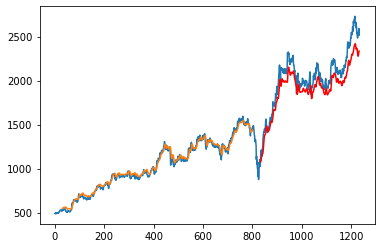

In [107]:
### Plotting 
# shift train predictions for plotting
look_back=p_day
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color="red")
plt.show()

In [55]:
len(test_data)

432

In [56]:
x_input=test_data[len(test_data)-p_day-1:].reshape(1,-1)
x_input.shape


(1, 8)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
len(temp_input)

8

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=p_day
futureDays=70
i=0

while(i<futureDays):
    
    if(len(temp_input)>p_day):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.89771149 0.90649877 0.91904566 0.92111463 0.93826654 0.93145915
 0.90480803]
0 day output [[0.7997876]]
1 day input [0.90649877 0.91904566 0.92111463 0.93826654 0.93145915 0.90480803
 0.79978758]
1 day output [[0.80185777]]
2 day input [0.91904566 0.92111463 0.93826654 0.93145915 0.90480803 0.79978758
 0.80185777]
2 day output [[0.79838234]]
3 day input [0.92111463 0.93826654 0.93145915 0.90480803 0.79978758 0.80185777
 0.79838234]
3 day output [[0.78798974]]
4 day input [0.93826654 0.93145915 0.90480803 0.79978758 0.80185777 0.79838234
 0.78798974]
4 day output [[0.77255124]]
5 day input [0.93145915 0.90480803 0.79978758 0.80185777 0.79838234 0.78798974
 0.77255124]
5 day output [[0.7500787]]
6 day input [0.90480803 0.79978758 0.80185777 0.79838234 0.78798974 0.77255124
 0.75007868]
6 day output [[0.7253253]]
7 day input [0.79978758 0.80185777 0.79838234 0.78798974 0.77255124 0.75007868
 0.72532529]
7 day output [[0.70221543]]
8 day input [0.80185777 0.79838234 0.787989

68 day output [[0.25802827]]
69 day input [0.28008342 0.27622968 0.27244931 0.26874059 0.26510191 0.26153162
 0.25802827]
69 day output [[0.2545903]]
[[0.7997875809669495], [0.8018577694892883], [0.7983823418617249], [0.7879897356033325], [0.7725512385368347], [0.7500786781311035], [0.7253252863883972], [0.7022154331207275], [0.6944802403450012], [0.6829785108566284], [0.668783962726593], [0.6534010767936707], [0.6380122303962708], [0.6240680813789368], [0.612045407295227], [0.6016420125961304], [0.590094804763794], [0.57823246717453], [0.5666877031326294], [0.555778980255127], [0.5455682277679443], [0.5358311533927917], [0.5262622237205505], [0.5166308879852295], [0.5072312951087952], [0.498187780380249], [0.4894919991493225], [0.4810687303543091], [0.4728323817253113], [0.464743435382843], [0.45682090520858765], [0.449124276638031], [0.441650927066803], [0.43437159061431885], [0.4272577166557312], [0.4202953577041626], [0.4134865403175354], [0.40683895349502563], [0.40035438537597656

In [60]:
day_new=np.arange(1,futureDays+1)
day_pred=np.arange(p_day+1,p_day+1+futureDays)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1234

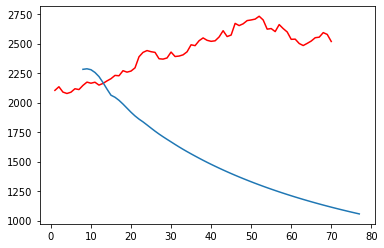

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-futureDays:]),color="red")
plt.plot(day_pred,scaler.inverse_transform(lst_output))

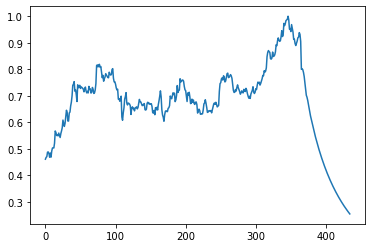

In [64]:
df3=df1.tolist()
df3.extend(lst_output)


plt.plot(df3[len(df1)-365:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()
df4 = pd.DataFrame(df3,columns =['Close'])
df4


,Close
0,488.643158
1,484.284454
2,489.113678
3,491.094910
4,496.023193
...,...
1299,1088.296581
1300,1080.118398
1301,1072.093941
1302,1064.219926


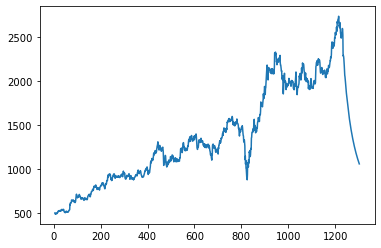

In [66]:
plt.plot(df4["Close"][5:])
plt.show()

In [67]:

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [68]:
r2 = r2_score(ytest, test_predict)